# TP : Random forest Appliqué au Titanic

## Récupération des données du cours ANN
Renvoie 2 Dataframe train (avec le champs Survived) et test (sans le champs Survived)

In [1]:
%run ./tp1_prepa_features.ipynb

<span style="color:blue;font-weight:bold">train :</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<span style="color:blue;font-weight:bold">test :</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<span style="color:blue;font-weight:bold">Effet de la classe</span>

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


<span style="color:blue;font-weight:bold">Effet du Genre</span>

      Sex  Survived
0  female  0.742038
1    male  0.188908


<span style="color:blue;font-weight:bold">Effet de la taille de la famille</span>

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


<span style="color:blue;font-weight:bold">Effet de la présence de la famille</span>

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


<span style="color:blue;font-weight:bold">Effet du Port d'embarquement</span>

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


<span style="color:blue;font-weight:bold">Effet du Prix du Ticket</span>

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


<span style="color:blue;font-weight:bold">Effet de l'age</span>

     CategoricalAge  Survived
0    (0.34, 16.336]  0.517857
1  (16.336, 32.252]  0.362613
2  (32.252, 48.168]  0.360784
3  (48.168, 64.084]  0.434783
4    (64.084, 80.0]  0.090909
Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


<span style="color:blue;font-weight:bold">Effet du titre</span>

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


<span style="color:blue;font-weight:bold">train mis en forme :</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
Fare        891 non-null float64
Embarked    891 non-null int32
IsAlone     891 non-null int64
Title       891 non-null int64
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.8 KB


<span style="color:blue;font-weight:bold">test mis en forme :</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int32
Age         418 non-null float64
Fare        418 non-null float64
Embarked    418 non-null int32
IsAlone     418 non-null int64
Title       418 non-null int64
dtypes: float64(2), int32(2), int64(3)
memory usage: 19.7 KB


##  Préparation des données de Training

In [2]:
from sklearn.model_selection import train_test_split
#Séparation des valeurs de train et label (tous les exemples)
X_alltrain = train.values[:, 1:]
y_alltrain = train.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X_alltrain, y_alltrain, random_state=42)
print('%i X_train, %i X_test, %i y_train, %i y_test'%(
    X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0]))
print('%i X_alltrain, %i y_alltrain'%(X_alltrain.shape[0], y_alltrain.shape[0]))
feature_names=train.columns.tolist()[1:]
target_names=["Disparu","Rescapé"]
print('features:',feature_names)
print('target:',target_names)

668 X_train, 223 X_test, 668 y_train, 223 y_test
891 X_alltrain, 891 y_alltrain
features: ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'IsAlone', 'Title']
target: ['Disparu', 'Rescapé']


## Fonction Utilitaires

In [3]:
# Fonctions permettant de générer le fichier d'envoi à Kaggle
#
#parametres: Classifiers; Données à calculer ; index)
def generer_resultats(clf,data=test.values,idx=finalfile_index):
    """
    Fonctions permettant de générer le fichier d'envoi à Kaggle.
    On passe un classifier sur lequel on refait le training avec toutes les données de training
    
    Parameters
    ----------
    Classifiers : Classifier utilisé pour la prédiction
    data : Données à calculer. par défaut, les valeurs du dataset "test"
    idx : Index des passagers testés. Stockés dans finalfile_index lors de la lecture des données
    """    
    print(clf.get_params())
    clf.fit(X_alltrain, y_alltrain)
    prediction=clf.predict(data)
    results=pd.DataFrame(prediction.astype(int), index = finalfile_index, columns=['Survived'])
    results.to_csv('resultats%s.csv'%clf.__class__.__name__)
    
#Fonction pour l'affichage 2 D des résultats    
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf,X,y, axes=[-0, 5, 0, 550], axis_name=['x1','x2'],alpha=0.5, contour=True):
    """
    Fonction pour l'affichage 2 D des résultats   
    
    Parameters
    ----------
    clf : Classifier à afficher
    X : features de Données a afficher
    y : labels de Données a afficher  
    axes : : Tailles des axes (valeur min/max)
    axis_name : Nom des axes sur le graphique
    alpha : Transparence des points
    contour : Afichage du contour
    """     
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo",label="Disparu", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ys", label="Rescapé",alpha=alpha)
    plt.axis(axes)
    plt.xlabel(axis_name[0], fontsize=18)
    plt.ylabel(axis_name[1]+ "  ",fontsize=18, rotation=0)    
    plt.legend(loc="lower right", fontsize=14)

## Exercice 1 : Arbre de Décision
En utilisant l'exemple 1, contruisez et testez un arbre de décision pour prévoir la survie. <br>
Essayez plusieurs valeurs pour max_depth <br>
Envoyer à Kaggle en utilisant la fonction generer_resultats

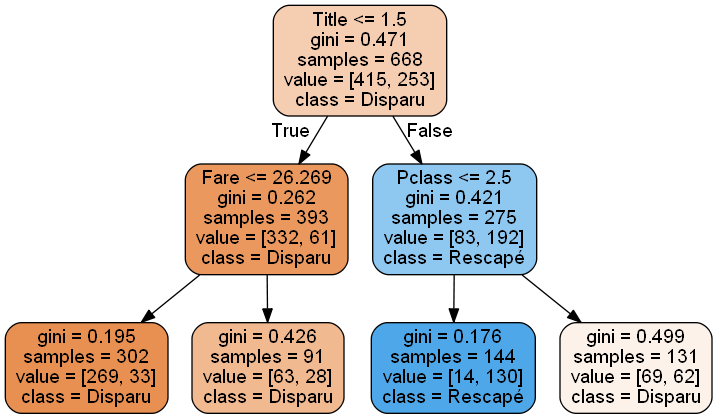

In [4]:
import os
from IPython.display import Image

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

export_graphviz(
        tree_clf,
        out_file="train_tree.dot",
        feature_names=feature_names,
        class_names=target_names,
        rounded=True,
        filled=True
    )

os.system("dot -Tpng train_tree.dot -o train_tree.png") 
Image("train_tree.png")

## Exercice 2 : Random Forest
En utilisant l'exemple 5, Réalisez un algorithme de Random Forest sur les données Titanic. <br>
Classez les features par ordre d'importance.<br>
Réglez le sur-apprentissage en utilisant les paramètres max_depth et max_features de l'arbre et / ou le nombre d'estimateurs.<br>
Envoyer les résultats sur Kaggle.<br>

In [5]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
for name, score in zip(feature_names, rnd_clf.feature_importances_):
    print('%s: %i%%' %(name, int(score*100)))
    

rnd_clf_short = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf_short.fit(train[['Title','Fare']].values, y_alltrain)


Pclass: 9%
Sex: 14%
Age: 25%
Fare: 27%
Embarked: 3%
IsAlone: 2%
Title: 17%


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

## Exercice 3 : Affichage de résultats
#En utilisant la fonction plot_decision_boundary, afficher les résultats pour de l'arbre seul et du modèle de forêt les variables Fare et Title

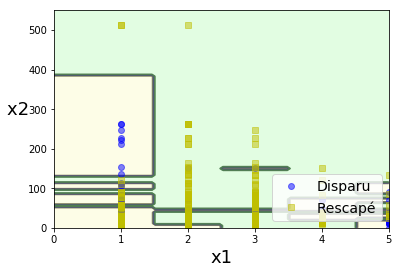

In [6]:
plot_decision_boundary(rnd_clf_short, train[['Title','Fare']].values, y_alltrain)

## Exercice 4 : Boosting
En vous inspirant de l'exemple 6, Testez ici Adaboost et le gradient Boosting <br>
Essayer differents paramètres de Learning Rate, nombre d'estimateurs, taille des arbres ...<br>
Appliquez le "Early Stopping"

In [8]:
import random
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    algorithm="SAMME.R", learning_rate=0.3, random_state=42)
ada_clf.fit(X_train, y_train)

rd_tree=random.randint(0,99)
print('Arbre N°',rd_tree)

export_graphviz(ada_clf.estimators_[rd_tree],
                feature_names=['x1','x2'],
                filled=True,
                rounded=True)

#appel à la fonction dot de graphwiz
os.system("dot -Tpng tree.dot -o tree.png")    
#Affichage de l'image créée
Image("tree.png")

y_pred_ada = ada_clf.predict(X_test)
print('score Adaboost :' , accuracy_score(y_test, y_pred_ada))
plt.figure(figsize=(21,8))
plot_decision_boundary(ada_clf, X, y)
plt.title("Adaptative Boosting", fontsize=14)
plt.show()

Arbre N° 68


C:\Users\Samix-PC-Bureautique\Anaconda3\lib\site-packages\sklearn\tree\export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


ValueError: Length of feature_names, 2 does not match number of features, 7

## Fonction de Cross Validation ##

In [ ]:
import sys
def cv_run(clf,X,y,name,sss):
    loop=1
    print('%s\n---------'%name)
    for train_index, test_index in sss.split(X, y):        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index],y[test_index]                    
#         print(X_train.shape,X_test.shape)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = (100 * accuracy_score(y_test, y_pred))
        if name in acc_dict:
          acc_dict[name] += acc          
        else:
          acc_dict[name] = acc     
        sys.stdout.write("%.2f ..." % acc)          
        sys.stdout.flush()
        loop+=1    
    print('\n')    

## Recherche des Hyperparametres Random Forest ##

In [ ]:
lst_nb_estimators= np.linspace(150, 400,2).astype(int)
lst_max_features = np.linspace(3,7,2).astype(int)
lst_max_depth= np.linspace(3,7,2).astype(int)
n_splits=10

model_dict={}

sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.1, random_state=0)
log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
for mf in lst_max_features:
    for md in  lst_max_depth :
        for ne in lst_nb_estimators:
            acc_dict = {}        
            name="ne_%s_mf_%s_md_%s"%(ne,mf,md)   
#             Définissez ici le modèle de forêt à tester rnd_clf
#             rnd_clf = ...
            model_dict[name]=rnd_clf
            cv_run(rnd_clf,X_alltrain,y_alltrain, name, sss)        
            for clf in acc_dict:
                acc_dict[clf] = round(acc_dict[clf] / n_splits,2)
                log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
                log = log.append(log_entry)
print(log)
log.sort_values("Accuracy",ascending=False,inplace=True)
generer_resultats(model_dict[log.Classifier.values[0]])
log